In [205]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
from UCEIS_dataset import UCEIS_cord, UCEIS_csv
from random import shuffle
from math import ceil

In [206]:
df = pd.read_csv(r'C:\Users\ElifKübraÇontar\Desktop\gi\label_x50.csv')
df.head()

,Unnamed: 0.1,frame_path,video_name,vascular_pattern_scores,bleeding_score,erosions_score,UCEIS_score,Unnamed: 0
0,0,C:\Users\ElifKübraÇontar\Desktop\gi\IBD\data_a...,video98,2,0,0,2,0.0
1,1,C:\Users\ElifKübraÇontar\Desktop\gi\IBD\data_a...,video98,2,0,0,2,50.0
2,2,C:\Users\ElifKübraÇontar\Desktop\gi\IBD\data_a...,video98,2,0,0,2,100.0
3,3,C:\Users\ElifKübraÇontar\Desktop\gi\IBD\data_a...,video98,1,0,0,1,150.0
4,4,C:\Users\ElifKübraÇontar\Desktop\gi\IBD\data_a...,video98,1,0,0,1,200.0


In [207]:
video_names=df['video_name'].unique()
print('Number of videos is:', len(video_names))
print('Number of total frames is :', len(df.index))

for video in video_names:
    tmp = df.loc[df['video_name'] == video]
    #print(video, len(tmp.index))

Number of videos is: 164
Number of total frames is : 6011


In [208]:
def split():
    frame_root = r'C:\Users\ElifKübraÇontar\Desktop\gi\IBD\data_all_frames_540x960'
    all_folders = [f for f in os.listdir(frame_root) if not f.startswith('.')]
    shuffle(all_folders)
    train_set_ratio = 0.7
    val_set_ratio = 0.15
    test_set_ratio = 0.15
    val_set_folder_size = ceil(val_set_ratio * len(all_folders))
    test_set_folder_size = ceil(test_set_ratio * len(all_folders))

    val_folders = all_folders[0:val_set_folder_size]
    test_folders = all_folders[val_set_folder_size:(val_set_folder_size + test_set_folder_size)]
    train_folders = all_folders[(val_set_folder_size + test_set_folder_size):]

    with open(r'C:\Users\ElifKübraÇontar\Desktop\gi\Code\splitted_folder_names\train_folders2.txt', "w") as f:
        for item in train_folders:f.write("%s\n" % item)

    with open(r'C:\Users\ElifKübraÇontar\Desktop\gi\Code\splitted_folder_names\val_folders2.txt', "w") as f:
        for item in val_folders:f.write("%s\n" % item)

    with open(r'C:\Users\ElifKübraÇontar\Desktop\gi\Code\splitted_folder_names\test_folders2.txt', "w") as f:
        for item in test_folders:f.write("%s\n" % item)

    return train_folders, val_folders, test_folders

def df_train_val_test_split(train_folders, val_folders, test_folders):
    train_df = df.loc[df['video_name'].isin(train_folders)]
    val_df = df.loc[df['video_name'].isin(val_folders)]
    test_df = df.loc[df['video_name'].isin(test_folders)]

    return train_df, val_df, test_df
train_folders, val_folders, test_folders = split()
train_df, val_df, test_df = df_train_val_test_split(train_folders, val_folders, test_folders)

In [209]:
frame_root = r'C:\Users\ElifKübraÇontar\Desktop\gi\IBD\data_all_frames_540x960'
cord_project_ID = '5c349378-3e58-4028-af97-96ad9d137dd3'
cord_API_key = 'fL_ktLRxfD90iQayw2dLVg-GVkPxQZVq9p6C6cvpvlg'

file = open(r'C:\Users\ElifKübraÇontar\Desktop\gi\Code\splitted_folder_names\test_folders2.txt')
test_folders = file.read().splitlines()
file.close()

file = open(r'C:\Users\ElifKübraÇontar\Desktop\gi\Code\splitted_folder_names\val_folders2.txt')
val_folders = file.read().splitlines()
file.close()

file = open(r'C:\Users\ElifKübraÇontar\Desktop\gi\Code\splitted_folder_names\train_folders2.txt')
train_folders = file.read().splitlines()
file.close()


train_df = df.loc[df['video_name'].isin(train_folders)]
val_df = df.loc[df['video_name'].isin(val_folders)]
test_df = df.loc[df['video_name'].isin(test_folders)]

print(len(train_df.index))
print(len(val_df.index))
print(len(test_df.index))
print(len(train_df.index)+ len(val_df.index) + len(test_df.index))
df=train_df

4402
554
1055
6011


In [210]:
vascular = df['vascular_pattern_scores']
bleeding = df['bleeding_score']
erosions = df['erosions_score']

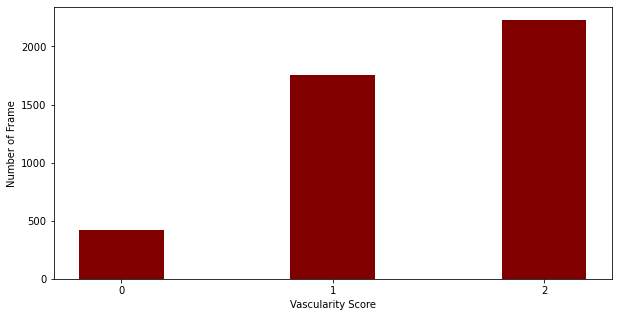

4402


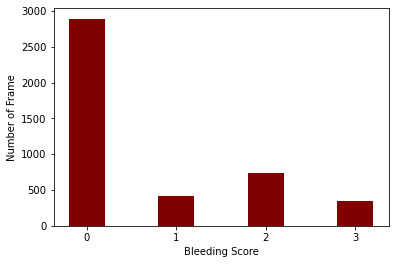

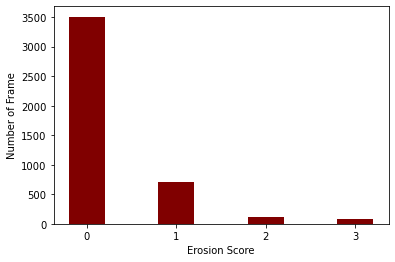

79


In [211]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(['0', '1', '2'],
        [vascular.tolist().count(0),vascular.tolist().count(1),vascular.tolist().count(2)],
        color ='maroon',
        width = 0.4)
plt.xlabel("Vascularity Score")
plt.ylabel("Number of Frame")
plt.show()
print(len(vascular.tolist()))

plt.bar(['0', '1', '2', '3'],
        [bleeding.tolist().count(0),bleeding.tolist().count(1),bleeding.tolist().count(2),bleeding.tolist().count(3)],
        color ='maroon',
        width = 0.4)
plt.xlabel("Bleeding Score")
plt.ylabel("Number of Frame")
plt.show()

plt.bar(['0', '1', '2', '3'],
        [erosions.tolist().count(0),erosions.tolist().count(1),erosions.tolist().count(2),erosions.tolist().count(3)],
        color ='maroon',
        width = 0.4)
plt.xlabel("Erosion Score")
plt.ylabel("Number of Frame")
plt.show()
print(erosions.tolist().count(3))

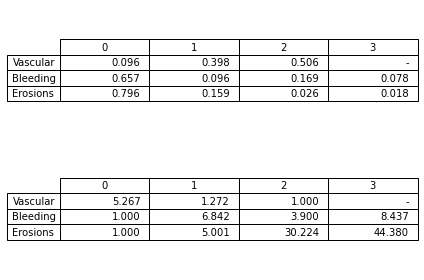

In [212]:
# Add a table at the bottom of the axes
fig, ax =plt.subplots(2,1)
fig.patch.set_visible(False)
columns=['0', '1', '2', '3']
rows=['Vascular', 'Bleeding', 'Erosions']
total_number_vascular = vascular.tolist().count(0)+vascular.tolist().count(1)+vascular.tolist().count(2)
total_number_bleeding = bleeding.tolist().count(0)+bleeding.tolist().count(1)+bleeding.tolist().count(2)+bleeding.tolist().count(3)
total_number_erosions = erosions.tolist().count(0)+erosions.tolist().count(1)+erosions.tolist().count(2)+erosions.tolist().count(3)
cell_text= [["{:.3f}".format(vascular.tolist().count(0)/total_number_vascular),
            "{:.3f}".format(vascular.tolist().count(1)/total_number_vascular),
            "{:.3f}".format(vascular.tolist().count(2)/total_number_vascular), '-'],
            ["{:.3f}".format(bleeding.tolist().count(0)/total_number_bleeding),
            "{:.3f}".format(bleeding.tolist().count(1)/total_number_bleeding),
            "{:.3f}".format(bleeding.tolist().count(2)/total_number_bleeding), 
            "{:.3f}".format(bleeding.tolist().count(3)/total_number_bleeding)],
            ["{:.3f}".format(erosions.tolist().count(0)/total_number_erosions),
            "{:.3f}".format(erosions.tolist().count(1)/total_number_erosions),
            "{:.3f}".format(erosions.tolist().count(2)/total_number_erosions), 
            "{:.3f}".format(erosions.tolist().count(3)/total_number_erosions)]]
ax[0].axis('tight')
ax[0].axis('off')
the_table = ax[0].table(cellText=cell_text,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='center')

max_vascular = max(max(vascular.tolist().count(0),vascular.tolist().count(1)),vascular.tolist().count(2))
max_bleeding = max(max(max(bleeding.tolist().count(0),bleeding.tolist().count(1)),bleeding.tolist().count(2)),bleeding.tolist().count(3))
max_erosions = max(max(max(erosions.tolist().count(0),erosions.tolist().count(1)),erosions.tolist().count(2)),erosions.tolist().count(3))

cell_text_mult= [["{:.3f}".format(max_vascular/vascular.tolist().count(0)),
            "{:.3f}".format(max_vascular/vascular.tolist().count(1)),
            "{:.3f}".format(max_vascular/vascular.tolist().count(2)), '-'],
            ["{:.3f}".format(max_bleeding/bleeding.tolist().count(0)),
            "{:.3f}".format(max_bleeding/bleeding.tolist().count(1)),
            "{:.3f}".format(max_bleeding/bleeding.tolist().count(2)), 
            "{:.3f}".format(max_bleeding/bleeding.tolist().count(3))],
            ["{:.3f}".format(max_erosions/erosions.tolist().count(0)),
            "{:.3f}".format(max_erosions/erosions.tolist().count(1)),
            "{:.3f}".format(max_erosions/erosions.tolist().count(2)), 
            "{:.3f}".format(max_erosions/erosions.tolist().count(3))]]
ax[1].axis('tight')
ax[1].axis('off')
the_table = ax[1].table(cellText=cell_text_mult,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='center')
fig.tight_layout()
plt.show()


In [213]:
uceis = []
for i in range(len(vascular)):
    uceis.append(vascular.tolist()[i] + bleeding.tolist()[i] + erosions.tolist()[i])

UCEIS Score distrubition

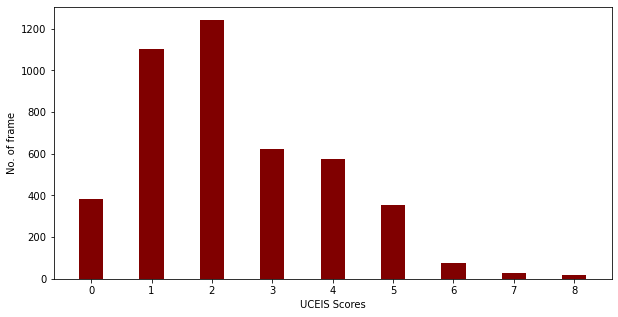

In [214]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(['0', '1', '2', '3', '4', '5', '6', '7','8'],
        [uceis.count(0),uceis.count(1),uceis.count(2),uceis.count(3),uceis.count(4),uceis.count(5),uceis.count(6),uceis.count(7),uceis.count(8)],
        color ='maroon',
        width = 0.4)
 
plt.xlabel("UCEIS Scores")
plt.ylabel("No. of frame")
plt.title("")
plt.show()

UCEIS Score 0 vs Other

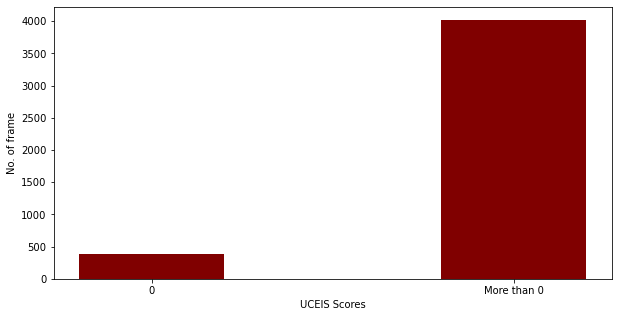

In [215]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(['0', 'More than 0'],
        [uceis.count(0),uceis.count(1)+uceis.count(2)+uceis.count(3)+uceis.count(4)+uceis.count(5)+uceis.count(6)+uceis.count(7)+uceis.count(8)],
        color ='maroon',
        width = 0.4)
 
plt.xlabel("UCEIS Scores")
plt.ylabel("No. of frame")
plt.title("")
plt.show()

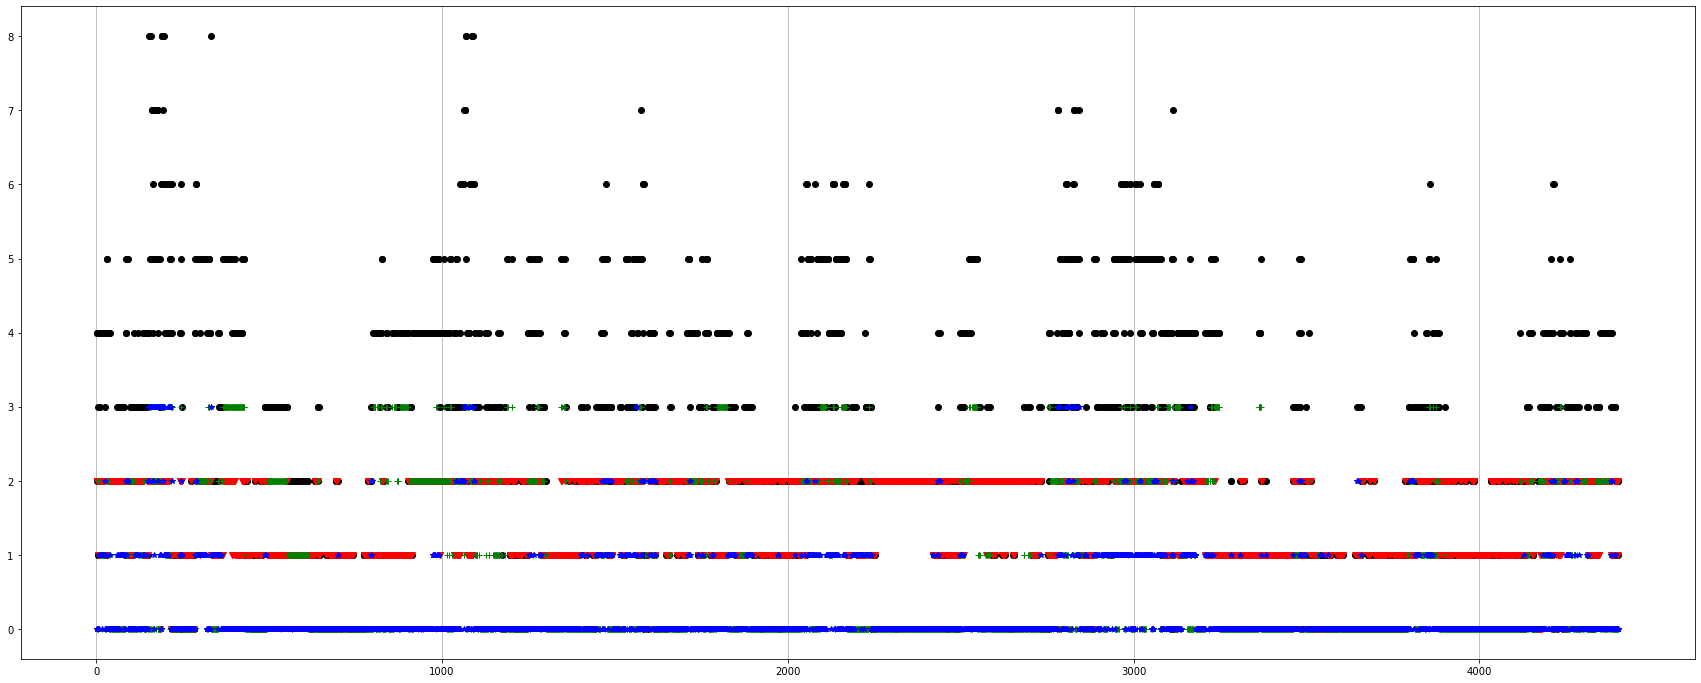

In [216]:
plt.figure(figsize=(30, 12))
x = np.arange(start=1, stop=len(uceis)+1)
plt.plot(x, uceis, 'o', color='black')
plt.plot(x, vascular.tolist(), 'v', color='red')
plt.plot(x, bleeding.tolist(), '+', color='green')
plt.plot(x, erosions.tolist(), '*', color='blue')
plt.grid(axis = 'x', which='both')
plt.show()